# Capítulo 13 - Processamento de imagens e reconhecimento de texto

In [4]:
from PIL import Image, ImageFilter

logo = Image.open('python.jpg')
blurryLogo = logo.filter(ImageFilter.GaussianBlur)
blurryLogo.save('python_blurred.jpg')
blurryLogo.show()


### Tesseract

In [5]:
# Colocando Variável Ambiente
! setx TESSDATA_PREFIX D:\WILLIAN\Tesseract-ORC\


ÒXITO: o valor especificado foi salvo.


In [6]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'D:\WILLIAN\Tesseract-ORC\tesseract.exe'
print(pytesseract.image_to_string(Image.open('python.jpg')))

python’



In [7]:
print(pytesseract.image_to_boxes(Image.open('python.jpg')))

p 0 0 21 37 0
y 25 0 45 37 0
t 49 12 61 44 0
h 65 12 85 50 0
o 88 12 110 37 0
n 114 12 133 37 0
’ 140 40 148 45 0



In [8]:
print(pytesseract.image_to_data(Image.open('python.jpg')))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	148	165	-1	
2	1	1	0	0	0	0	115	148	50	-1	
3	1	1	1	0	0	0	115	148	50	-1	
4	1	1	1	1	0	0	115	148	50	-1	
5	1	1	1	1	1	0	115	148	50	87.976830	python’



In [9]:
# Podemos criar uma saída em um dicionário.
from PIL import Image
import pytesseract
from pytesseract import Output

print(pytesseract.image_to_data(Image.open('textOriginal.png'),output_type=Output.DICT))

# Podemos criar uma saída em BYTES.
print(pytesseract.image_to_data(Image.open('textOriginal.png'),output_type=Output.BYTES))

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1, 2, 3, 4, 5, 6], 'left': [0, 23, 23, 23, 23, 76, 99, 164, 215, 295, 317, 378, 425, 467, 500, 555, 23, 23, 140, 198, 239, 304, 407], 'top': [0, 26, 26, 26, 26, 26, 30, 26, 26, 26, 26, 26, 26, 26, 26, 26, 54, 55, 55, 59, 59, 55, 54], 'width': [600, 555, 555, 555, 44, 15, 57, 42, 70, 15, 52, 40, 32, 24, 45, 23, 513, 107, 49, 32, 57, 92, 129], 'height': [103, 51, 51, 22, 17, 17, 13, 21, 17, 17, 21, 17, 17, 17, 17, 22, 23, 17, 17, 13, 13, 22, 23], 'conf': [-1, -1, -1, -1, 96, 96, 96, 95, 96, 96, 96, 96, 96, 96, 96, 96

### Numpy

In [10]:
import numpy as np
numbers = [100,102,98,97,103]
print(np.std(numbers))
print(np.mean(numbers))

2.280350850198276
100.0


In [11]:
def cleanFile(filepath, newFilePath):
	image = Image.open(filepath)

	# Define um valor de limitar para a imagem e salva
	image = image.point(lambda x: 0 if x <143 else 255)
	image.save(newFilePath)
	return image

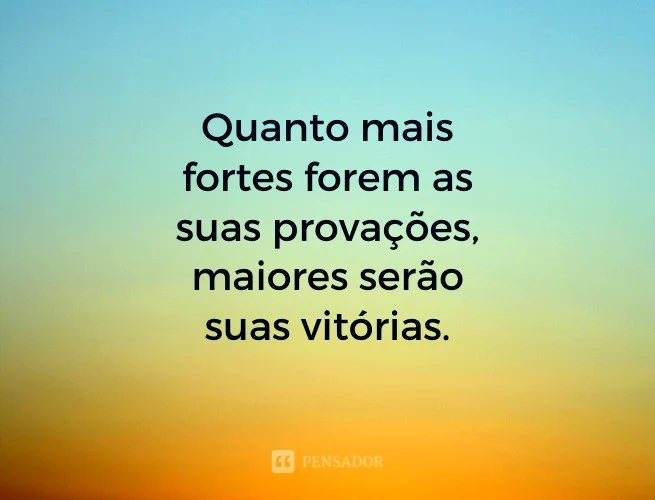

In [12]:
# Abrindo a image original.
Image.open('frases.webp')

In [13]:
# Transformando os dados em strings sem tratar a imagem.
image = Image.open('frases.webp')
print(pytesseract.image_to_string(image=image))

Quanto mais
fortes forem as
suas provacoes,

maiores serao

suas vitorias.




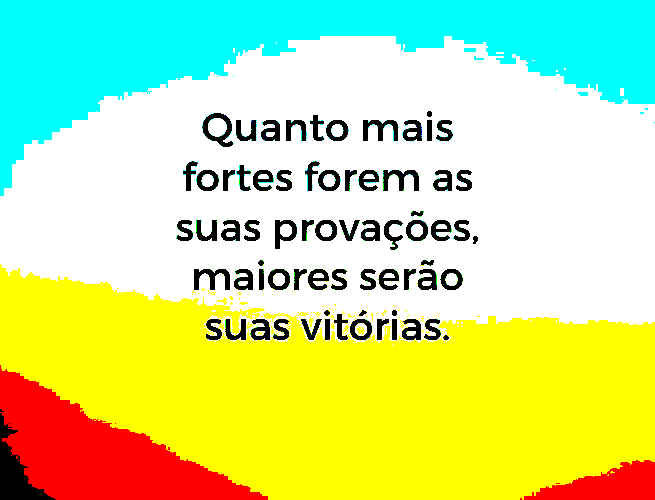

In [14]:
# Arquivo limpo e destacando a frase.
cleanFile('frases.webp','frases_novo.webp')

In [15]:
# Transformando os dados após tratar a imagem.
image = cleanFile('frases.webp','frases_novo.webp')
print(pytesseract.image_to_string(image=image))

# Ocorrem alguns erros em relação a pontuações. Normal!

Quanto mais
fortes forem as
suas provacoes,
maiores serao
suas vitorias:




### Ajustes automáticos nas imagens

In [16]:
import pytesseract
from pytesseract import Output
from PIL import Image
import numpy as np


def cleanFile(filePath, threshold):
	image = Image.open(filePath)
    #Set a threshold value for the image, and save
	image = image.point(lambda x: 0 if x<threshold else 255)
	return image


def getConfidence(image):
    data = pytesseract.image_to_data(image, output_type=Output.DICT)
    text = data['text']
    confidences = []
    numChars = []

    for i in range(len(text)):
        if data['conf'][i] > -1:
            confidences.append(data['conf'][i])
            numChars.append(len(text[i]))

    return np.average(confidences, weights=numChars), sum(numChars)

filePath = 'textBad.png'

start = 80
step = 5
end = 200

for threshold in range(start, end, step):
    image = cleanFile(filePath, threshold)
    scores = getConfidence(image)
    print('threshold: {}, confidence: {}, numChars {}'.format(str(threshold), scores[0], scores[1]))

threshold: 80, confidence: 48.666666666666664, numChars 18
threshold: 85, confidence: 64.65217391304348, numChars 23
threshold: 90, confidence: 45.5945945945946, numChars 37
threshold: 95, confidence: 39.48717948717949, numChars 39
threshold: 100, confidence: 56.310344827586206, numChars 58
threshold: 105, confidence: 52.943661971830984, numChars 71
threshold: 110, confidence: 68.16867469879519, numChars 83
threshold: 115, confidence: 73.82926829268293, numChars 82
threshold: 120, confidence: 75.52380952380952, numChars 84
threshold: 125, confidence: 82.45882352941176, numChars 85
threshold: 130, confidence: 75.22619047619048, numChars 84
threshold: 135, confidence: 87.78313253012048, numChars 83
threshold: 140, confidence: 83.44705882352942, numChars 85
threshold: 145, confidence: 88.72619047619048, numChars 84
threshold: 150, confidence: 86.42168674698796, numChars 83
threshold: 155, confidence: 87.72151898734177, numChars 79
threshold: 160, confidence: 84.275, numChars 80
threshold:

### Coletando texto de imagens em sites